In [2]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,MaxPooling2D,Flatten
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
trainX = x_train.reshape((x_train.shape[0], 28, 28, 1))
testX = x_test.reshape((x_test.shape[0], 28, 28, 1))
trainX = trainX/255
testX = testX/255

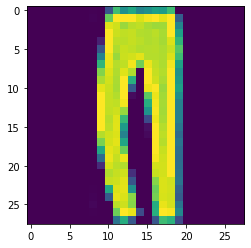

In [4]:
%matplotlib inline
plt.imshow(x_test[2])

In [5]:
trainY = np_utils.to_categorical(y_train,10)
testY = np_utils.to_categorical(y_test,10)

In [6]:
classifier = Sequential()
classifier.add(Conv2D(filters=32, kernel_size=(3,3),strides=(1, 1), input_shape=(28,28,1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dropout(rate=0.2))
classifier.add(Dense(units=10, activation='softmax'))

In [7]:
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [9]:
history = classifier.fit(trainX, trainY,
 batch_size=128, epochs=20,
 verbose=2,
 validation_data=(testX, testY))

Epoch 1/20
469/469 - 17s - loss: 0.5713 - accuracy: 0.7941 - val_loss: 0.4234 - val_accuracy: 0.8462 - 17s/epoch - 36ms/step
Epoch 2/20
469/469 - 16s - loss: 0.3677 - accuracy: 0.8672 - val_loss: 0.3434 - val_accuracy: 0.8741 - 16s/epoch - 34ms/step
Epoch 3/20
469/469 - 16s - loss: 0.3196 - accuracy: 0.8830 - val_loss: 0.3095 - val_accuracy: 0.8884 - 16s/epoch - 35ms/step
Epoch 4/20
469/469 - 17s - loss: 0.2902 - accuracy: 0.8929 - val_loss: 0.2905 - val_accuracy: 0.8937 - 17s/epoch - 35ms/step
Epoch 5/20
469/469 - 16s - loss: 0.2662 - accuracy: 0.9027 - val_loss: 0.2809 - val_accuracy: 0.8971 - 16s/epoch - 33ms/step
Epoch 6/20
469/469 - 15s - loss: 0.2462 - accuracy: 0.9101 - val_loss: 0.2666 - val_accuracy: 0.9036 - 15s/epoch - 33ms/step
Epoch 7/20
469/469 - 15s - loss: 0.2314 - accuracy: 0.9156 - val_loss: 0.2682 - val_accuracy: 0.9021 - 15s/epoch - 32ms/step
Epoch 8/20
469/469 - 15s - loss: 0.2142 - accuracy: 0.9204 - val_loss: 0.2539 - val_accuracy: 0.9081 - 15s/epoch - 32ms/step


In [30]:
test_img = image.load_img("./content/sneaker.jpg", target_size=(28, 28))
test_img = image.img_to_array(test_img)
test_img = test_img[:,:,1].reshape(1,28,28,1)
test_img = test_img/255
(classifier.predict(test_img) > 0.5).astype("int32")

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

In [29]:
test_img2 = image.load_img("./content/bag.jpg", target_size=(28, 28))
test_img2 = image.img_to_array(test_img2)
test_img2 = test_img2[:,:,1].reshape(1,28,28,1)
test_img2 = test_img2/255
(classifier.predict(test_img2) > 0.5).astype("int32")

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [31]:
test_img3 = image.load_img("content/shirt.jpg", target_size=(28, 28))
test_img3 = image.img_to_array(test_img3)
test_img3 = test_img3[:,:,1].reshape(1,28,28,1)
test_img3 = test_img3/255
(classifier.predict(test_img3) > 0.5).astype("int32")

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

In [33]:
classifier.save('fashion_model')

INFO:tensorflow:Assets written to: fashion_model\assets


In [7]:
final_img = image.load_img("content/bag.jpg", target_size=(28, 28))
final_img = image.img_to_array(final_img)
final_img = final_img[:, :, 1].reshape(1, 28, 28, 1)
final_img = final_img / 255

model = tf.keras.models.load_model('fashion_model')

l = (model.predict(final_img) > 0.5).astype("int32")

print(l)

ans = 0
for i in range(0, len(l[0])):
    if l[0][i] == 1:
        ans = i

f = open("fl.txt", "w")
f.write(str(ans))
f.close()

[[0 0 0 0 0 0 0 0 1 0]]
